In [2]:
import matplotlib.pyplot as plt
import graphlab

# Initiation
graphlab.product_key.get_product_key()
sales = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv')
graphlab.canvas.set_target('ipynb')

# Draw Points
sales.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

This non-commercial license of GraphLab Create for academic use is assigned to sadrnezhaad@ce.sharif.edu and will expire on June 16, 2021.
------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1592328223.log


Finished parsing file /home/smmsadrnezh/PycharmProjects/linear_regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.017984 secs.

Finished parsing file /home/smmsadrnezh/PycharmProjects/linear_regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.023573 secs.

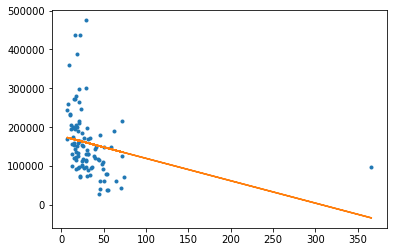

In [3]:
# Linear Regression
crime_model = graphlab.linear_regression.create(sales, target='HousePrice', features=['CrimeRate'], validation_set=None,
                                                verbose=False)
plt.plot(sales['CrimeRate'], sales['HousePrice'], '.', sales['CrimeRate'], crime_model.predict(sales), '-')

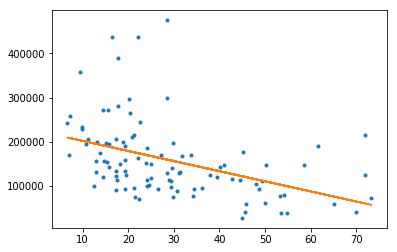

In [4]:
# Refit without City Center
sales_noCC = sales[sales['MilesPhila'] != 0.0]
crime_model_noCC = graphlab.linear_regression.create(
    sales_noCC,
    target='HousePrice',
    features=['CrimeRate'],
    validation_set = None,
    verbose = False
)
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

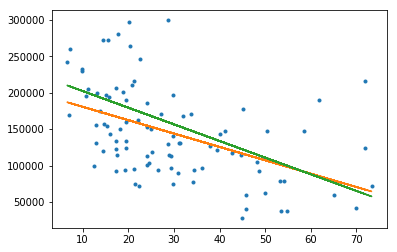

In [5]:
# Remove High House Prices and draw regression again
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000]
crime_model_nohighend = graphlab.linear_regression.create(
    sales_nohighend,
    target='HousePrice',
    features=['CrimeRate'],
    validation_set=None,
    verbose=False
)

plt.plot(sales_nohighend['CrimeRate'], sales_nohighend['HousePrice'], '.',
         sales_nohighend['CrimeRate'], crime_model_nohighend.predict(sales_nohighend), '-',
         sales_nohighend['CrimeRate'], crime_model_noCC.predict(sales_nohighend), '-')
